# TASK 1

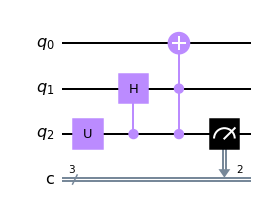

In [1]:
%run Matrices.ipynb
%matplotlib inline

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from numpy import pi, sqrt
from sympy import *

q =  QuantumRegister(3,"q") # quantum register with 3 qubits
c = ClassicalRegister(3,"c") # classical register with 3 bits
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
U = Operator([
    [sqrt(2/3), -1/sqrt(3)],
    [1/sqrt(3), sqrt(2/3)]
])

qc.unitary(U, [2], label='U')     # the same as qc.ry(1.23, q[2])
qc.ch(q[2], q[1])
qc.ccx(q[2], q[1], q[0])

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state = np.round(np.array(job.result().get_statevector(qc)), decimals=10)

# measurement of the leftmost qubit q[2]
qc.measure(q[2], c[2])

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)

# drawing circuit
qc.draw(output='mpl',reverse_bits=False)

## Resulting state

In [2]:
Matrix(current_quantum_state.real)

[0.8164965809]
[            ]
[     0      ]
[            ]
[     0      ]
[            ]
[     0      ]
[            ]
[0.4082482905]
[            ]
[     0      ]
[            ]
[     0      ]
[            ]
[0.4082482905]

In [3]:
Statevector(np.array(current_quantum_state)).draw(output='latex')

<IPython.core.display.Latex object>

### Checking entanglement (proof) #1

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$

We have to check whether the state $\frac{\sqrt{6}}{3}\ket{000} + \frac{\sqrt{6}}{6}\ket{100} + \frac{\sqrt{6}}{6}\ket{111}$ is or isn’t entangled.

Every separable (not entangled) state can be written as a tensor product of other states, like this

$$
(\alpha_1\ket{u_1} + \beta_1\ket{v_1} + \gamma_1\ket{w_1}) \otimes (\alpha_2\ket{u_2} + \beta_2\ket{v_2} + \gamma_2\ket{w_2})
$$

Using distribution, we will get

$$
\alpha_1\beta_1\gamma_1\ket{u_1} \otimes \ket{v_1} \otimes \ket{w_1} + \alpha_1\beta_1\gamma_2\ket{u_1} \otimes \ket{v_1} \otimes \ket{w_2} + \dots + \alpha_2\beta_2\gamma_2\ket{u_2} \otimes \ket{v_2} \otimes \ket{w_2}
$$

Our given state will in these terms look like a following

$$
\ket{u_1} \otimes \ket{v_1} \otimes \ket{w_1} + \ket{u_2} \otimes \ket{v_1} \otimes \ket{w_1} + \ket{u_2} \otimes \ket{v_2} \otimes \ket{w_2}
$$

$$
\alpha_1\beta_1\gamma_1\ket{u_1} \otimes \ket{v_1} \otimes \ket{w_1} + \alpha_2\beta_1\gamma_1\ket{u_2} \otimes \ket{v_1} \otimes \ket{w_1} + \alpha_2\beta_2\gamma_2\ket{u_2} \otimes \ket{v_2} \otimes \ket{w_2}
$$

For the coefficients, we will write down the three following equivalencies

$$
\begin{align}
\alpha_1\beta_1\gamma_1 = \frac{\sqrt{6}}{3} \\
\alpha_2\beta_1\gamma_1 = \frac{\sqrt{6}}{6} \\
\alpha_2\beta_2\gamma_2 = \frac{\sqrt{6}}{6} \\
\end{align}
$$

And the rest must be equal to 0, so we can write, for example, that 

$$
\begin{align}\alpha_1\beta_1\gamma_2 = 0
\end{align}
$$

By looking at the eq. (4) we can conclude that $\alpha_1$ and/or $\beta_1$ and/or $\gamma_2$ must be equal to 0. But by stating this, for $\alpha_1 = 0$, eq. (1) won’t hold; for $\beta_1 = 0$, eq. (1) and (2) won’t hold and for $\gamma_2 = 0$, eq. (3) won’t hold.

We came to a contradiction and thus we can say, that **the given state is entangled**.

### Checking entanglement (proof) #2

1. we create a density matrix $\rho$ of the whole system
2. then we make a subsystems $\rho_A$, $\rho_B$ and $\rho_C$ by tracing out other qubits
3. finally we take a trace $Tr$ of the sub-system raised to the power 2

If the trace is <u>exactly 1</u>, we know that the given system <u>wasn't entangled</u> <br>
If the trace is <u>less than 1</u> we know that the given system <u>was entangled</u>

In [4]:
# step 1

from qiskit import quantum_info as qi

qstate = Matrix(current_quantum_state)
rho = qi.DensityMatrix(np.array(qstate@Dagger(qstate)))
rho.draw('latex', prefix='\\rho = ')

<IPython.core.display.Latex object>

In [5]:
# step 2
rho_C = qi.partial_trace(rho,[0, 1])
rho_B = qi.partial_trace(rho,[0, 2])
rho_A = qi.partial_trace(rho,[1, 2])

display(rho_C.draw('latex', prefix='\\rho_C = '))
display(rho_B.draw('latex', prefix='\\rho_B = '))
display(rho_A.draw('latex', prefix='\\rho_A = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
# step 3
subsystem = Matrix(rho_C)@Matrix(rho_C)
Tr = subsystem.trace()
print("Trace of the subsystem: ", Tr)

Trace of the subsystem:  0.777777777780999


or we can use a built-in function `purity()`

In [18]:
print("State purity of rho_C: ", np.round(np.real(rho_C.purity()),15))
print("State purity of rho_B: ", np.round(np.real(rho_A.purity()),15))
print("State purity of rho_A: ", np.round(np.real(rho_B.purity()),15))

State purity of rho_C:  0.777777777780999
State purity of rho_B:  0.722222222205773
State purity of rho_A:  0.722222222205773


We see that the density matrix is not pure and thus from the above stated, we can conclude that **the given state is entangled**.

## Outcomes after measurement and their probabilities

results:  {'100': 367, '000': 657}


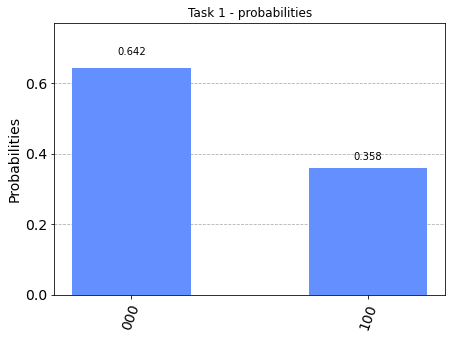

In [8]:
print("results: ", counts)
plot_histogram(job.result().get_counts(), title="Task 1 - probabilities")

### Checking entanglement

Both $\ket{000}$ ($= \ket{0} \otimes \ket{0} \otimes \ket{0}$) and $\ket{100}$ ($= \ket{1} \otimes \ket{0} \otimes \ket{0}$) are not entangled.

## Checking results by computation

In [9]:
%run Matrices.ipynb

U = Matrix(((sqrt(2/3),-1/sqrt(3)),(1/sqrt(3),sqrt(2/3))))
CH = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/sqrt(2), 1/sqrt(2)], [0, 0, 1/sqrt(2), -1/sqrt(2)]])
CCX = Matrix([[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0]])
#print(U)
statevector = CCX@TensorProduct(CH, I)@TensorProduct(U,I,I)@TensorProduct(zero,zero,zero)
statevector

[0.816496580927726]
[                 ]
[        0        ]
[                 ]
[        0        ]
[                 ]
[        0        ]
[                 ]
[        ___      ]
[      \/ 6       ]
[      -----      ]
[        6        ]
[                 ]
[        0        ]
[                 ]
[        0        ]
[                 ]
[        ___      ]
[      \/ 6       ]
[      -----      ]
[        6        ]

In [10]:
Statevector(np.array(statevector)).draw(output='latex')

<IPython.core.display.Latex object>

## Outcomes from IBM Quantum

<img src="Task_1.png"/>